# Introduction to Probability & Sampling (with/without Replacement) — Python Notes



## 1) What are the chances? *(Motivation)*

* We casually ask “what are the chances?” (closing a sale, rain, winning).
* To answer rigorously, we use **probability**.

---

## 2) Measuring chance *(Definition & Simple Example)*

* **Probability of an event**

  $$
  P(\text{event})=\frac{\#\text{ favorable outcomes}}{\#\text{ possible outcomes}}
  $$

* Example (coin flip): 1 way to get **Heads** out of 2 outcomes → $\frac{1}{2}=0.5=50\%$.
* Probabilities range from **0%** (impossible) to **100%** (certain).
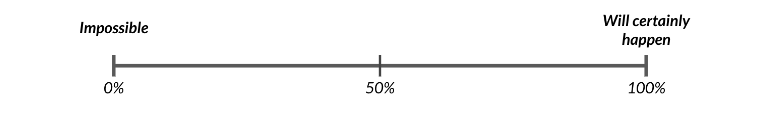
---

## 3) Assigning salespeople *(Scenario setup)*

* We have a sales team; we put each person’s name on a ticket and pick randomly.

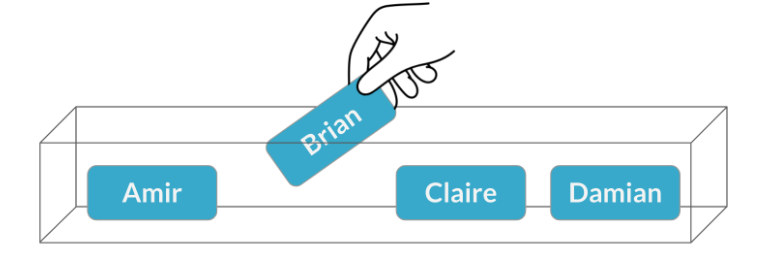


* First pick: **Brian**. With 4 people, $P(\text{Brian}) = \frac{1}{4} = 25\%$.

### Code: Create a small DataFrame of salespeople

```python
import pandas as pd

# A small dataset of salespeople and their total sales
sales_counts = pd.DataFrame({
    "name":    ["Brian", "Claire", "Damian", "Amir"],
    "n_sales": [128,       75,       69,      178]
})

sales_counts
```

#### Expected Output

```
     name  n_sales
0   Brian      128
1  Claire       75
2  Damian       69
3    Amir      178
```

#### Line-by-line Explanation

* `import pandas as pd`

  * **What:** Imports pandas.
  * **Why:** We’ll use a DataFrame to mirror the “tickets in a box” with rows.
  * **Result:** `pd` refers to pandas.

* `sales_counts = pd.DataFrame({...})`

  * **What:** Builds a table with names and a made-up sales count.
  * **Why:** Provides concrete rows to sample from (one row per person).
  * **Result:** DataFrame with 4 rows (Brian, Claire, Damian, Amir).

* `sales_counts`

  * **What:** Displays the DataFrame.
  * **Why:** So we can see our “box” of names.
  * **Result/Meaning:** Confirms the four candidates we will sample from.

---

## 4) Sampling from a DataFrame *(Random single pick)*

* `DataFrame.sample()` randomly picks rows. By default, `n=1`.
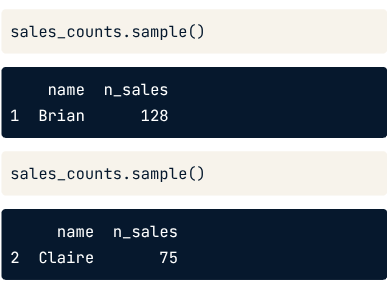

 
### Code: Randomly sample 1 person (unseeded — output will vary)

However, if we run the same thing again, we may get a different row since the sample method chooses randomly
 
```python
# Randomly pick 1 row (person). Output will vary run-to-run if no seed is set.
one_pick = sales_counts.sample(1)
one_pick
```

#### Example Output (will vary)

```
     name  n_sales
0   Brian      128
```

#### Line-by-line Explanation

* `one_pick = sales_counts.sample(1)`

  * **What:** Randomly selects 1 row.
  * **Why:** Simulates drawing one ticket from the box.
  * **Result:** A 1-row DataFrame. The name can be any of the four.

* `one_pick`

  * **What:** Displays that sampled row.
  * **Why:** To see who was picked.
  * **Meaning:** Shows the randomly selected person for the meeting.

---

## 5) Setting a random seed *(Reproducibility)*

* To show the team exactly how Brian was picked (and get the **same** result each run), we set a **seed**.
* The transcript mentions `np.random.seed(...)`; pandas also offers `random_state=` on `.sample()` for deterministic results.
*  The number itself doesn't matter. We could use 5, 139, or 3 million. The only thing that matters is that we use the same seed the next time we run the script. Now, we, or one of the sales-team members, can run this code over and over and get Brian every time.



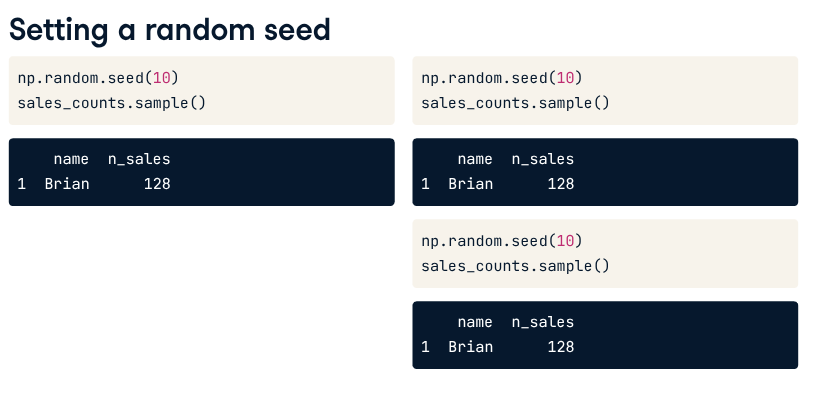

### Code: Reproducible single pick using NumPy’s seed (matches transcript)

```python
import numpy as np

np.random.seed(139)           # set the global RNG seed
seeded_pick = sales_counts.sample(1)   # uses NumPy's RNG when random_state isn't provided
seeded_pick
```

#### Expected Output

```
     name  n_sales
0   Brian      128
```

#### Line-by-line Explanation

* `import numpy as np`

  * **What:** Imports NumPy.
  * **Why:** We’ll set the global random seed as per the transcript.
  * **Result:** `np` refers to NumPy.

* `np.random.seed(139)`

  * **What:** Fixes the starting state of the random number generator.
  * **Why:** Ensures the same “random” choice every run for demos/reviews.
  * **Result:** Subsequent random draws (including `sample()` without `random_state`) are reproducible.

* `seeded_pick = sales_counts.sample(1)`

  * **What:** Randomly selects 1 row (now deterministic due to the seed).
  * **Why:** Simulates the draw but reproducibly.
  * **Result:** Always returns the same row under this seed (here, **Brian**).

* `seeded_pick`

  * **What:** Displays the deterministic selection.
  * **Meaning:** Shows the reproducible choice; aligns with “we can get Brian every time” if we keep the same seed & code.

> **Alternative (also deterministic):**
> `sales_counts.sample(1, random_state=139)` — uses a dedicated per-call seed instead of the global NumPy seed.

---

## 6) A second meeting — *Sampling without replacement* *(Dependent events)*

* New constraint: **Brian is already taken**, so we pick from the remaining 3.
* This is **sampling without replacement**: we **do not return** the first name to the box.
* Now events are **dependent**: the second pick’s probabilities change based on the first.
* Now there's another potential client who wants to meet at the same time, so we need to pick another salesperson. Brian has already been picked and he can't be in two meetings at once, so we'll pick between the remaining three. This is called sampling without replacement, since we aren't replacing the name we already pulled out.

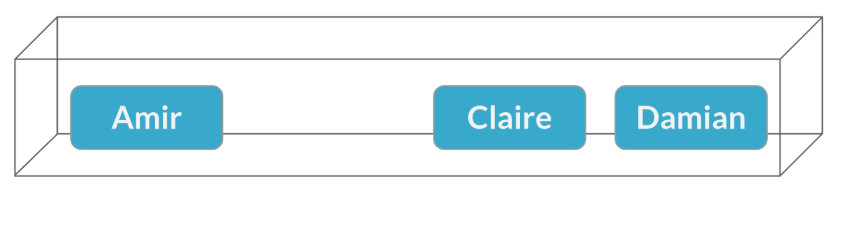

### Code: Two people for simultaneous meetings (without replacement)

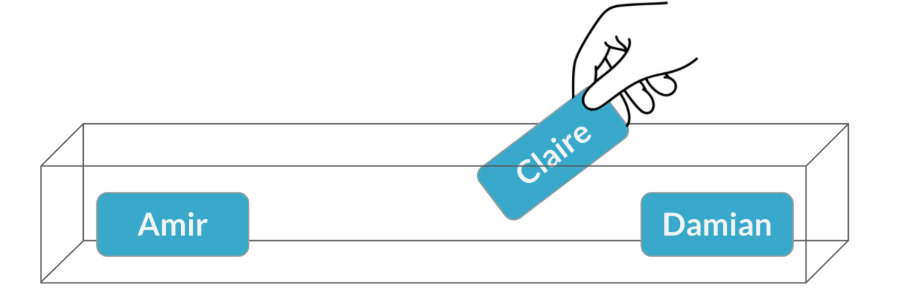
* This time, Claire is picked, and the probability of this is one out of three, or about 33%.

#### Significance of the Output

* If **Claire** was picked **first**, $P(\text{Claire second}) = 0\%$ (can’t be picked again).
* If **someone else** was picked first, then for the **second pick** there are 3 names left and Claire is 1 of them → $\frac{1}{3} \approx 33\%$.

---

## 7) A second meeting — *Sampling with replacement* *(Independent events)*

* If the two meetings are on **different days**, the same person can attend both.
* This is **sampling with replacement**: after a pick, we **return** the name to the box.
* Now each pick is **independent**: the second pick’s probabilities **do not change** due to the first pick.
* To recreate this in Python, we can pass 2 into the sample method, which will give us 2 rows of the DataFrame.

### Code: Two independent picks (with replacement)

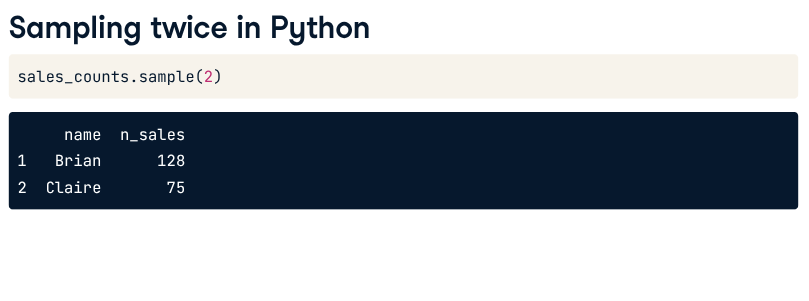

Now let's say the two meetings are happening on different days, so the same person could attend both. In this scenario, we need to return Brian's name to the box after picking it. This is called sampling with replacement.

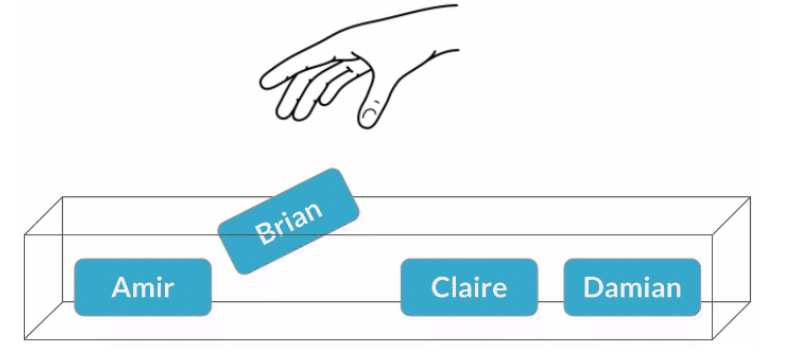

#### Significance of the Output

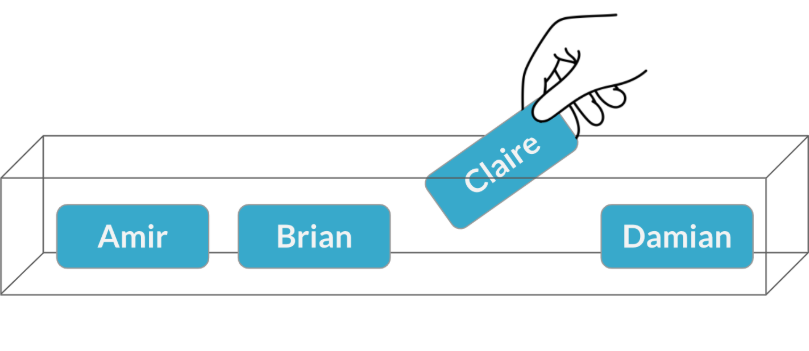
Claire gets picked for the second meeting, but this time, the probability of picking her is 25%.

* Each pick is **independent** and has $P(\text{Claire}) = \frac{1}{4} = 25\%$, regardless of the first pick’s outcome.

---

## 8) Sampling multiple times with replacement *(Duplicates possible)*

* With replacement, duplicates across many picks are expected/allowed.
* Matches the slide idea: `sales_counts.sample(5, replace=True)` can repeat names.

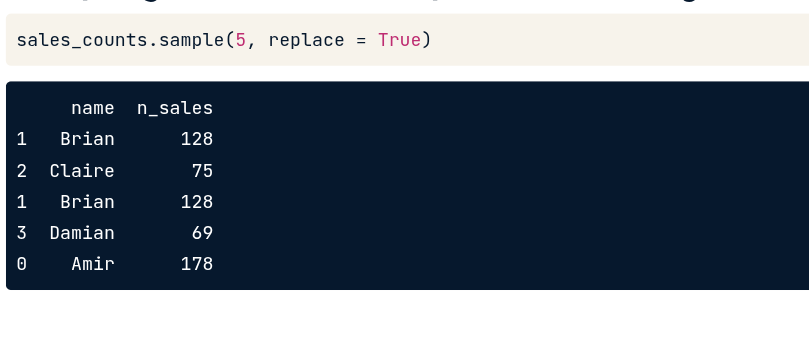

#### Line-by-line Explanation

* To sample with replacement, set the replace argument to True, so names can appear more than once. If there were 5 meetings, all at different times, it's possible to pick some rows multiple times since we're replacing them each time.

---

## 9) Independent vs Dependent Events *(Concept wrap-up)*

* **Independent events:**
  The outcome of the first event **does not** change the probability of the second.

  * **Example:** Sampling **with** replacement → each pick has the same probabilities.
  * **Claire second (with replacement):** $25\%$ regardless of who was first.

* **Dependent events:**
  The outcome of the first event **does** change the probability of the second.

  * **Example:** Sampling **without** replacement → the pool shrinks after each pick.
  * **Claire second (without replacement):**

    * If Claire was first → $0\%$.
    * If someone else was first → $\frac{1}{3} \approx 33\%$.

---

## 10) Key Takeaways

* **Sampling with replacement** → **independent** picks; probabilities stay constant each draw.
* **Sampling without replacement** → **dependent** picks; probabilities change as items are removed.
* Use **seeds** (`np.random.seed(...)` or `random_state=...`) for **reproducible** demonstrations.
* In pandas, `.sample(n, replace=...)` simulates both scenarios cleanly.

---



### Exercise
With or without replacement?
In the video, you learned about two different ways of taking samples: with replacement and without replacement. Although it isn't always easy to tell which best fits various situations, it's important to correctly identify this so that any probabilities you report are accurate. In this exercise, you'll put your new knowledge to the test and practice figuring this out.

Instructions

For each scenario, decide whether it's sampling with replacement or sampling without replacement.


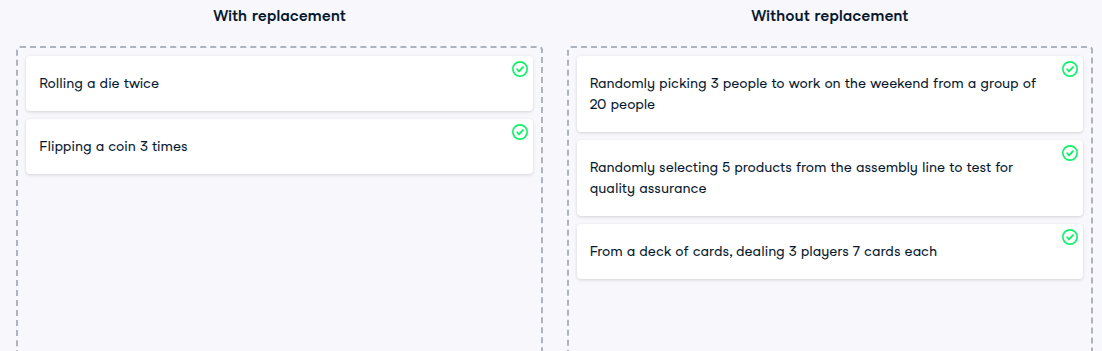

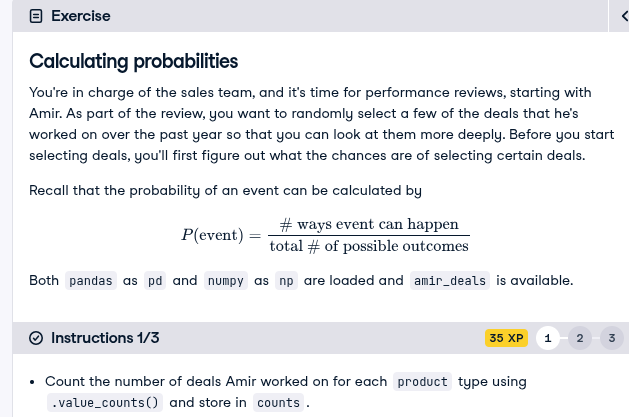



```python

# Count the deals for each product
counts = amir_deals['product'].value_counts()
print(counts)

<script.py> output:
    Product B    62
    Product D    40
    Product A    23
    Product C    15
    Product F    11
    Product H     8
    Product I     7
    Product E     5
    Product N     3
    Product G     2
    Product J     2
    Name: product, dtype: int64
```
2. Calculate the probability of selecting a deal for the different product types by dividing the counts by the total number of deals Amir worked on. Save this as probs.

```python
# Count the deals for each product
counts = amir_deals['product'].value_counts()

# Calculate probability of picking a deal with each product
probs = counts / len(amir_deals)
print(probs)

<script.py> output:
    Product B    0.348
    Product D    0.225
    Product A    0.129
    Product C    0.084
    Product F    0.062
    Product H    0.045
    Product I    0.039
    Product E    0.028
    Product N    0.017
    Product G    0.011
    Product J    0.011
    Name: product, dtype: float64

```
3. Question
* If you randomly select one of Amir's deals, what's the probability that the deal will involve Product C?

Possible answers

15%

80.43%

### 8.43%

22.5%

124.3%



### Exercise
Sampling deals
In the previous exercise, you counted the deals Amir worked on. Now it's time to randomly pick five deals so that you can reach out to each customer and ask if they were satisfied with the service they received. You'll try doing this both with and without replacement.

Additionally, you want to make sure this is done randomly and that it can be reproduced in case you get asked how you chose the deals, so you'll need to set the random seed before sampling from the deals.

Both pandas as pd and numpy as np are loaded and amir_deals is available.

Instructions 1/3

Set the random seed to 24.
Take a sample of 5 deals without replacement and store them as sample_without_replacement.

```python
# Set random seed
np.random.seed(24)

# Sample 5 deals without replacement
sample_without_replacement = amir_deals.sample(5)
print(sample_without_replacement)

<script.py> output:
         Unnamed: 0    product   client status   amount  num_users
    127         128  Product B  Current    Won  2070.25          7
    148         149  Product D  Current    Won  3485.48         52
    77           78  Product B  Current    Won  6252.30         27
    104         105  Product D  Current    Won  4110.98         39
    166         167  Product C      New   Lost  3779.86         11
In [2]:

```

2. Take a sample of 5 deals with replacement and save as sample_with_replacement

```python
# Set random seed
np.random.seed(24)

# Sample 5 deals with replacement
sample_with_replacement = amir_deals.sample(5, replace=True)
print(sample_with_replacement)

<script.py> output:
         Unnamed: 0    product   client status   amount  num_users
    162         163  Product D  Current    Won  6755.66         59
    131         132  Product B  Current    Won  6872.29         25
    87           88  Product C  Current    Won  3579.63          3
    145         146  Product A  Current    Won  4682.94         63
    145         146  Product A  Current    Won  4682.94         63
```
3. Question
What type of sampling is better to use for this situation?2

Possible answers


With replacement

Without replacement

It doesn't matter


# Introduction to Statistics in Python — Discrete Distributions & Sampling


---

## 1) Discrete Distributions

* A **probability distribution** assigns a probability to each possible outcome of a random process.
* **Example**: Rolling a fair six-sided die (outcomes 1–6) — each outcome has probability $1/6 \approx 0.1667$.
* The **expected value (mean)** of a distribution is the probability-weighted average of outcomes.

---

## 2) Rolling a Fair Die (Uniform Discrete Distribution)

* Outcomes: $\{1,2,3,4,5,6\}$
* Probabilities: all equal to $1/6$
* This is a **discrete uniform distribution** (all outcomes equally likely).

### Code: Represent a fair die as a DataFrame and compute its expected value

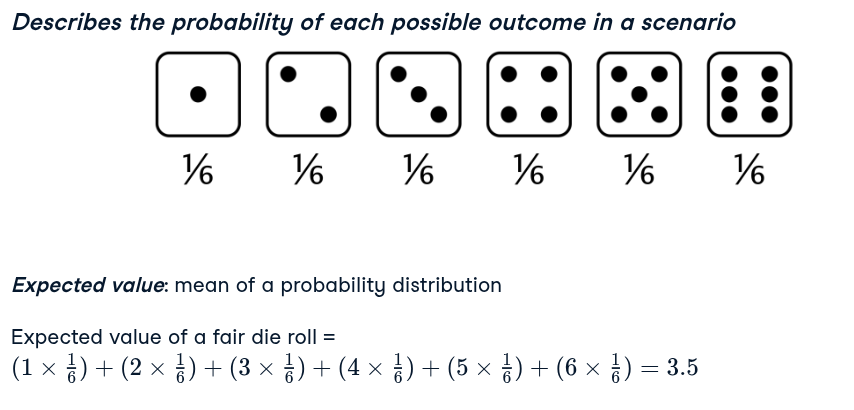

```python
import numpy as np
import pandas as pd

# Build a DataFrame for a fair die
die = pd.DataFrame({
    "number": [1, 2, 3, 4, 5, 6],
    "prob":   [1/6]*6
})

# Expected value (theoretical mean) of a fair die
ev_fair = np.mean(die["number"])
ev_fair
```

**Expected output**

```
3.5
```

**Line-by-line explanation**

* `import numpy as np; import pandas as pd`
  Imports NumPy and pandas for numerical work and tabular data.
* `die = pd.DataFrame({...})`
  Creates a table with two columns: `number` (1–6) and `prob` (=1/6 each). This encodes the distribution.
* `ev_fair = np.mean(die["number"])`
  For a uniform die, the expected value equals the arithmetic mean of 1..6, which is 3.5.
  (Equivalently: $\sum x \cdot p(x) = \frac{1+2+3+4+5+6}{6} = 3.5$.)
* Returning `ev_fair` shows the theoretical mean **3.5**.

**Why it matters**
The **expected value** summarizes the center of the distribution you’d expect **on average** over many repeated rolls.

---

## 3) Visualizing a Probability Distribution & “Probability = Area”

* A bar plot can show each **outcome** on the x-axis and its **probability** as bar height.

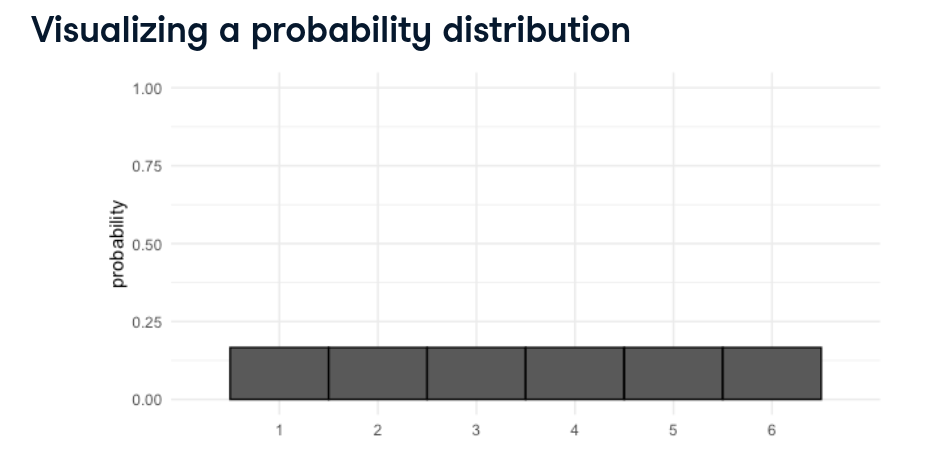

### Probability = area
* We can calculate probabilities of different outcomes by taking areas of the probability distribution.

* For example, what's the probability that our die roll is less than or equal to 2? To figure this out,

* we'll take the area of each bar representing an outcome of 2 or less.

* For discrete distributions, the **probability of an event** (e.g., roll ≤ 2) is the **sum of bar areas** for outcomes in that event.
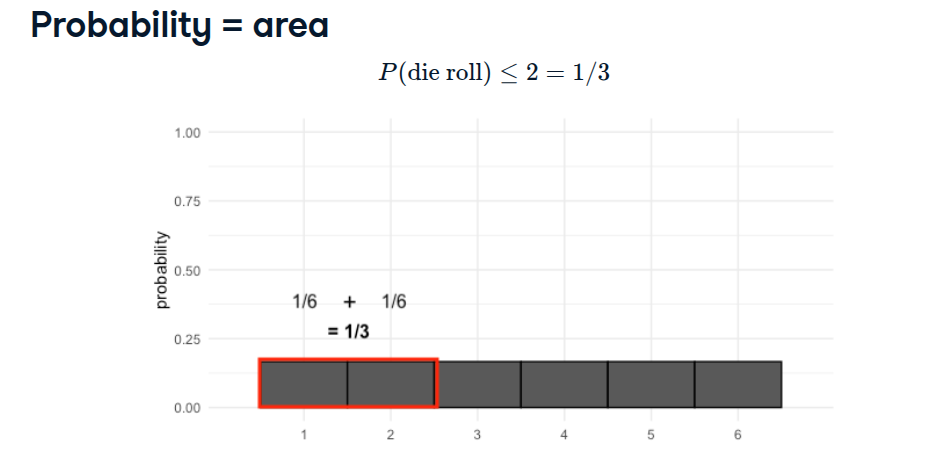
  * Fair die: $P(\text{roll} \le 2) = P(1) + P(2) = \frac{1}{6} + \frac{1}{6} = \frac{2}{6} = \frac{1}{3}$.

**Why it matters**
For **discrete** distributions, the probability of a compound event is just the **sum** of the relevant probabilities.

---

## 4) An “Uneven” Die (Reassigning Probability Mass)

> Scenario: The “2” face is turned into a “3”, so:
>
> * $P(2) = 0$
> * $P(3) = 1/3$ (since it inherits its original $1/6$ **plus** the $1/6$ from the “2”)
> * All other faces remain at $1/6$

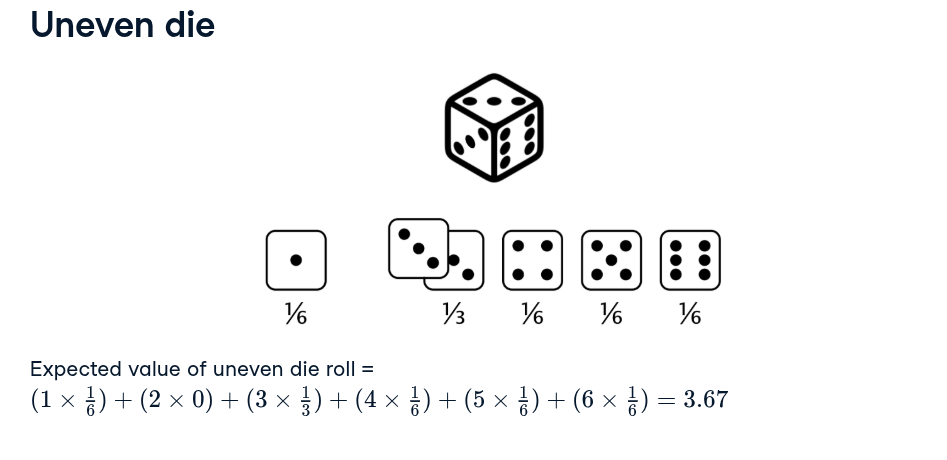

### Visualizing uneven probabilities
* When we visualize these new probabilities, the bars are no longer even
  
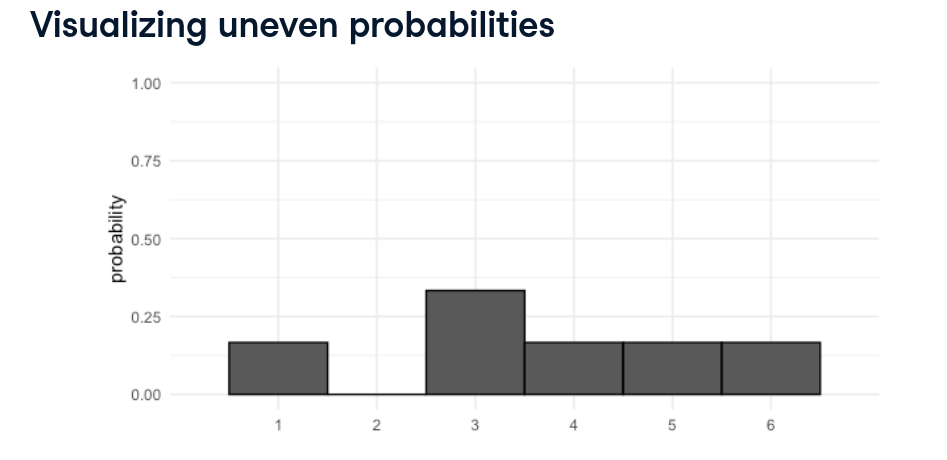


**Why it matters**
Shifting probability mass toward larger outcomes **increases** the expected value.


* Compares to fair die’s $1/3$: the event “≤2” is **less likely** now.

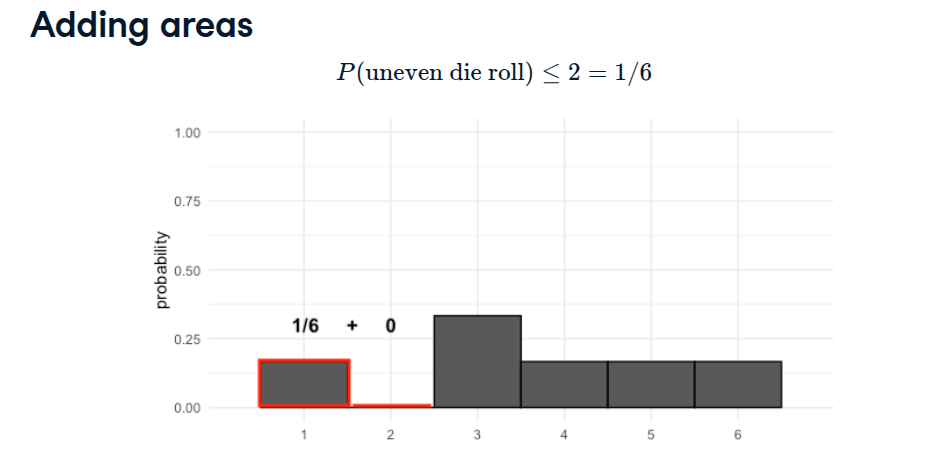

---

## 5) Sampling from a Discrete Distribution

> We simulate actual rolls to see how **samples** compare to the **theoretical** distribution.
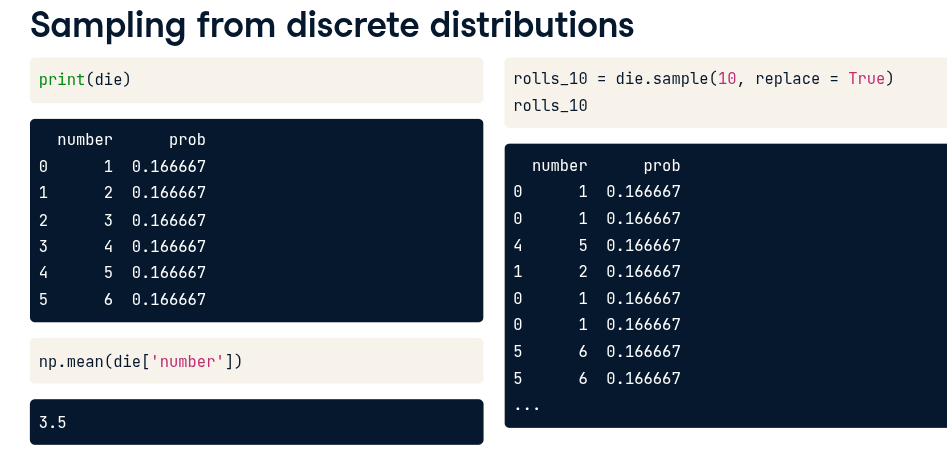
> Just like we sampled names from a box, we can do the same thing with probability distributions like the ones we've seen. Here's a DataFrame called die that represents a fair die, and its expected value is 3-point-5. We'll sample from it 10 times to simulate 10 rolls. Notice that we sample with replacement so that we're sampling from the same distribution every time.

**Significance of the output**
Even though each face is equally likely, a **small sample** can be uneven (e.g., more 1s and 3s). The sample mean (**3.0**) is **not exactly** the theoretical mean (**3.5**)—that variation is normal for small $n$.

### Code: Visualize the 10-roll sample

```python
import matplotlib.pyplot as plt
import numpy as np

# Histogram with bins aligned to die faces
rolls_10["number"].hist(bins=np.linspace(1, 7, 7))
plt.xlabel("Die face")
plt.ylabel("Frequency")
plt.title("Histogram of 10 simulated fair-die rolls")
plt.show()
```
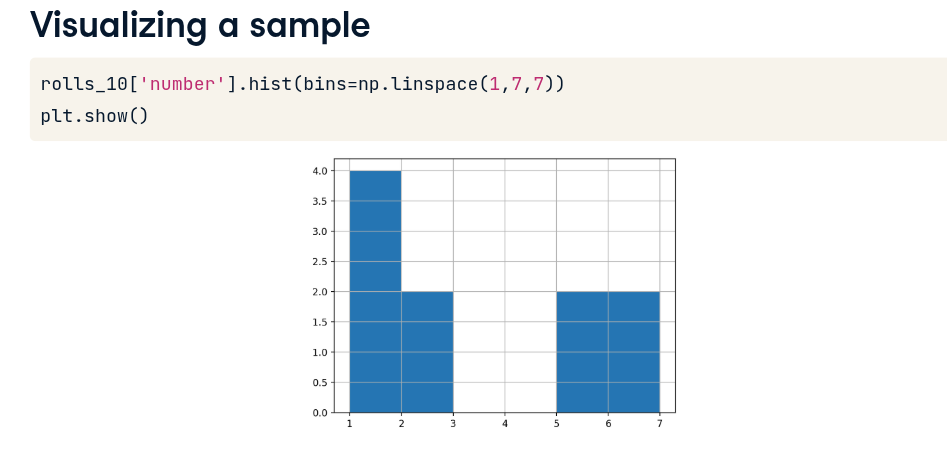

**Expected output (description)**
A histogram with 6 bins (for faces 1–6). The bar heights show how many times each face appeared in the 10 rolls. They won’t be equal in such a small sample.

**Line-by-line explanation**

* `rolls_10["number"].hist(...)`
  Draws a histogram of observed faces. `bins=np.linspace(1,7,7)` creates edges at 1,2,3,4,5,6 (right-open at 7).
* `plt.xlabel`, `plt.ylabel`, `plt.title`
  Label and title the chart.
* `plt.show()`
  Renders the plot.

---

## 6) Sample Distribution vs. Theoretical Distribution (Growing Sample Size)

> As we increase the number of rolls, the sample looks more like the theoretical distribution, and the sample mean approaches 3.5.
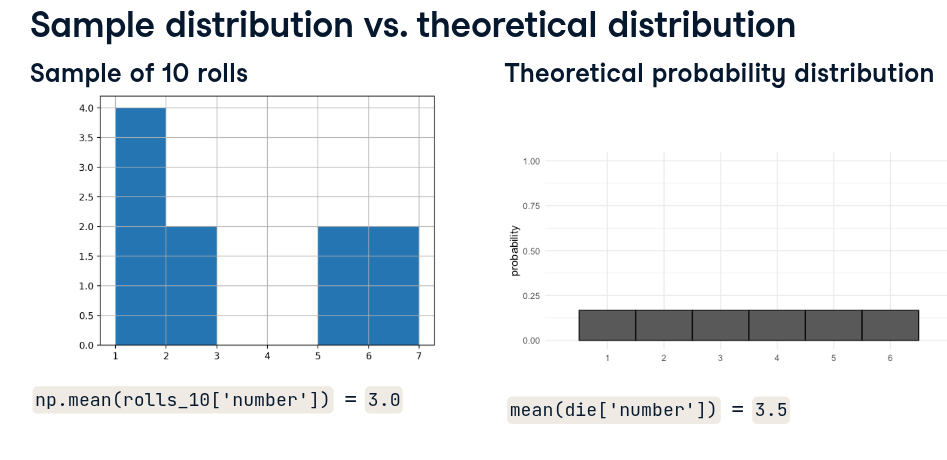


**Significance of the output**

* $n=10$ → mean **3.0** (farther from 3.5)
* $n=100$ → mean **3.4** (closer)
* $n=1000$ → mean **3.48** (very close)
  This illustrates the **Law of Large Numbers**.

---

## 7) Law of Large Numbers (LLN)

* **Statement**: As sample size $n \to \infty$, the sample mean $\bar{X}_n$ **approaches** the theoretical mean $E[X]$.
* **Here**: As we roll the die more times, the histogram flattens toward equal bars, and the sample mean approaches **3.5**.

---

## Quick Reference Table (from the slides)

| Sample size | Sample mean |
| ----------: | ----------: |
|          10 |        3.00 |
|         100 |        3.40 |
|        1000 |        3.48 |

The **theoretical** mean remains **3.5**.

---

## Key Takeaways

* **Discrete distributions** assign probabilities to countable outcomes (e.g., die faces).
* A **discrete uniform** distribution has equal probability for each outcome (fair die: each $=1/6$).
* The **expected value** (mean) summarizes the long-run average outcome (fair die: **3.5**).
* **Probability as area/sum** (discrete case): add bar heights (probabilities) over the outcomes in the event.
* **Changing probabilities** (e.g., moving mass from 2 to 3) shifts the expected value (from **3.5** to **\~3.667** here).
* **Sampling** shows randomness: small samples vary; larger samples better reflect the true distribution.
* **Law of Large Numbers**: with more data, the **sample mean** converges to the **theoretical mean**.


### Exercise
Creating a probability distribution
A new restaurant opened a few months ago, and the restaurant's management wants to optimize its seating space based on the size of the groups that come most often. On one night, there are 10 groups of people waiting to be seated at the restaurant, but instead of being called in the order they arrived, they will be called randomly. In this exercise, you'll investigate the probability of groups of different sizes getting picked first. Data on each of the ten groups is contained in the restaurant_groups DataFrame.

Remember that expected value can be calculated by multiplying each possible outcome with its corresponding probability and taking the sum. The restaurant_groups data is available. pandas is loaded as pd, numpy is loaded as np, and matplotlib.pyplot is loaded as plt.

Instructions 1/4

1. Create a histogram of the group_size column of restaurant_groups, setting bins to [2, 3, 4, 5, 6]. Remember to show the plot.

```python
# Create a histogram of restaurant_groups and show plot
restaurant_groups['group_size'].hist(bins=[2,3,4,5,6])
plt.show()
```
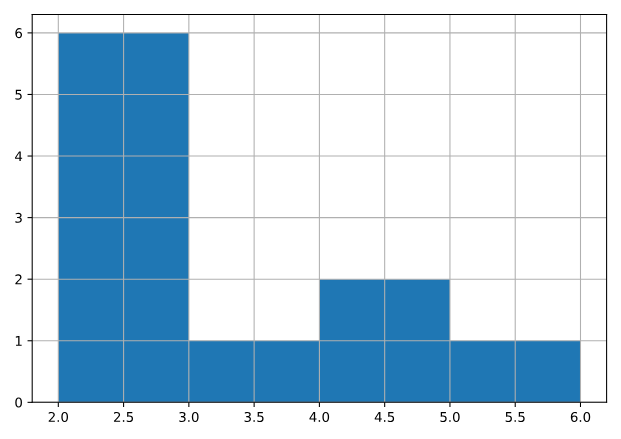

2. Count the number of each group_size in restaurant_groups, then divide by the number of rows in restaurant_groups to calculate the probability of randomly selecting a group of each size. Save as size_dist.
Reset the index of size_dist.
Rename the columns of size_dist to group_size and prob.

```python
# Create probability distribution
size_dist = restaurant_groups['group_size'].value_counts() / len(restaurant_groups['group_size']) 

# Reset index and rename columns
size_dist = size_dist.reset_index()
size_dist.columns = ['group_size', 'prob']

print(size_dist)

<script.py> output:
       group_size  prob
    0           2   0.6
    1           4   0.2
    2           6   0.1
    3           3   0.1

```
3.  Calculate the expected value of the size_dist, which represents the expected group size, by multiplying the group_size by the prob and taking the sum.

```python
# Create probability distribution
size_dist = restaurant_groups['group_size'].value_counts() / restaurant_groups.shape[0]
# Reset index and rename columns
size_dist = size_dist.reset_index()
size_dist.columns = ['group_size', 'prob']

# Calculate expected value
expected_value = np.sum(size_dist['group_size'] * size_dist['prob'])
print(expected_value)


<script.py> output:
    2.9000000000000004
    
```
4. Calculate the probability of randomly picking a group of 4 or more people by subsetting for groups of size 4 or more and summing the probabilities of selecting those groups.

```python
# Create probability distribution
size_dist = restaurant_groups['group_size'].value_counts() / restaurant_groups.shape[0]
# Reset index and rename columns
size_dist = size_dist.reset_index()
size_dist.columns = ['group_size', 'prob']

# Expected value
expected_value = np.sum(size_dist['group_size'] * size_dist['prob'])

# Subset groups of size 4 or more
groups_4_or_more = size_dist[size_dist['group_size'] >= 4]

# Sum the probabilities of groups_4_or_more
prob_4_or_more = groups_4_or_more['prob'].sum()
print(prob_4_or_more)



<script.py> output:
    0.30000000000000004
```


# Introduction to Statistics in Python: Continuous Distributions

## 1. Continuous Distributions

- **Discrete distributions** model countable events (e.g., number of heads in coin tosses).
- **Continuous distributions** model variables that can take *any* value in a range (e.g., waiting time for a bus).
- For continuous variables, there are infinitely many possible values.

---

## 2. Example: Waiting for the Bus

Suppose:
- The city bus arrives *exactly* every 12 minutes.
- You arrive at a random time.
- Your possible waiting time ranges from **0** minutes (you just catch the bus) to **12** minutes (you just missed it).

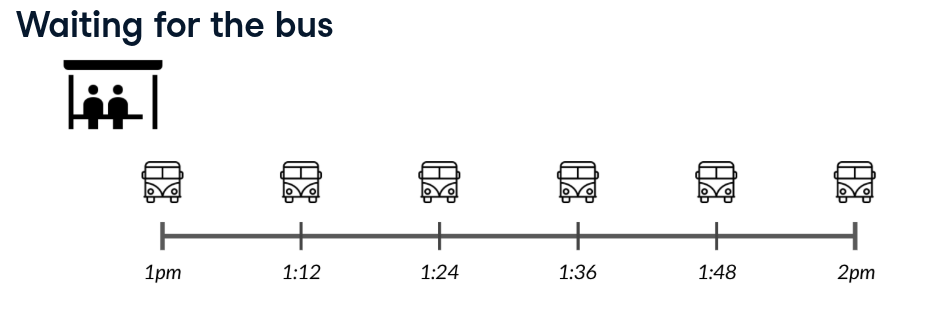

---

## 3. The Continuous Uniform Distribution

- For this bus scenario, **any wait time between 0 and 12 minutes is equally likely**.
- This is called a **continuous uniform distribution**.
    - All intervals of the same length within [0, 12] are equally probable.
- Unlike discrete, we cannot list every possible wait time (infinite possibilities!).
- We represent the distribution as a **flat line** (constant probability density).

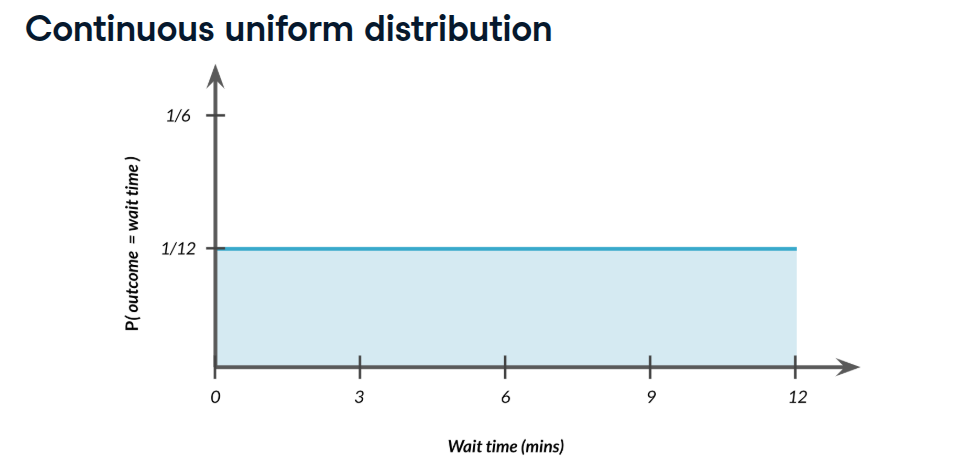

---

## 4. Probability as Area

- In continuous distributions, **probability = area** under the curve (or line).
- For the uniform distribution over [0, 12]:
    - **Height** of the line: `1/12` (since total area = 1).
    - **Width**: the interval we're interested in.
    - **Area** for interval `[a, b]`: `(b - a) * (1/12)`.

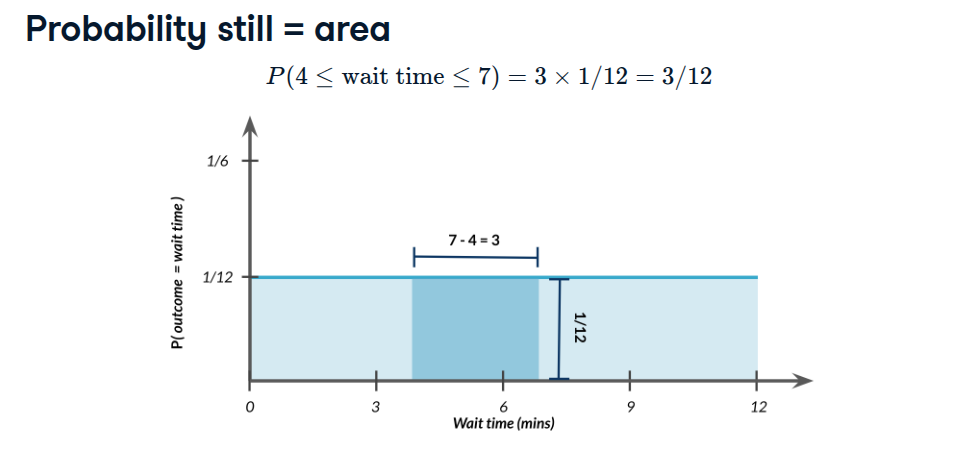

---

### Example: Probability of Waiting Between 4 and 7 Minutes

- **Width**: `7 - 4 = 3`
- **Height**: `1/12`
- **Area (probability)**: `3 * (1/12) = 1/4 = 0.25` (**25%**)

---

## 5. Calculating Probabilities in Python

We can use `scipy.stats.uniform` to calculate probabilities for the uniform distribution.

### **Code Example:** Probability of Waiting ≤ 7 Minutes

```python
from scipy.stats import uniform

# Cumulative probability of waiting <= 7 minutes in [0, 12]
prob_7_or_less = uniform.cdf(7, 0, 12)
print(prob_7_or_less)
```

#### **Output:**
```
0.5833333333333334
```

#### **Explanation (Line by Line):**

1. `from scipy.stats import uniform`
    - **What:** Imports the `uniform` distribution from `scipy.stats`.
    - **Why:** Allows us to use methods for the uniform distribution (e.g., `cdf`, `rvs`).
    - **Result:** We can now access uniform distribution functions.
2. `prob_7_or_less = uniform.cdf(7, 0, 12)`
    - **What:** Calculates the cumulative distribution function (CDF) up to 7.
    - **Why:** The CDF gives the probability of a random variable being less than or equal to 7.
    - **Parameters:**
        - `7`: The value up to which to compute the probability.
        - `0`: Lower bound of distribution.
        - `12`: Width (scale) of the distribution.
    - **Result:** Returns the probability of waiting ≤ 7 minutes.
3. `print(prob_7_or_less)`
    - **What:** Prints the calculated probability.
    - **Why:** To view the result.
    - **Result:** Output is `0.583...` or about **58%**.

**Significance:**  
There is about a **58% chance** you will wait **7 minutes or less**.

---
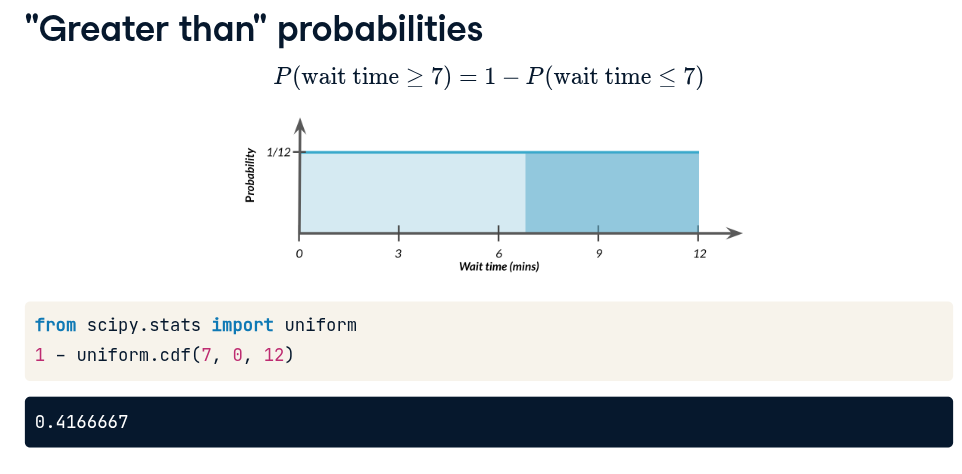

### **Code Example:** Probability of Waiting Between 4 and 7 Minutes

To find the probability of waiting **between 4 and 7 minutes**, subtract the probability of waiting ≤ 4 minutes from that of waiting ≤ 7 minutes.

```python
from scipy.stats import uniform

prob_between_4_and_7 = uniform.cdf(7, 0, 12) - uniform.cdf(4, 0, 12)
print(prob_between_4_and_7)
```

#### **Output:**
```
0.25
```

#### **Explanation (Line by Line):**

1. `from scipy.stats import uniform`
    - **As above.**
2. `prob_between_4_and_7 = uniform.cdf(7, 0, 12) - uniform.cdf(4, 0, 12)`
    - **What:** Computes the probability of being between 4 and 7.
    - **Why:** Subtracts cumulative probability up to 4 from cumulative up to 7.
    - **Result:** Gives the probability for the interval [4, 7].
3. `print(prob_between_4_and_7)`
    - **As above.**

**Significance:**  
There is a **25% chance** of waiting **between 4 and 7 minutes**.

---

## 6. Total Area and Certainty

- **Total area under the uniform distribution** (from 0 to 12) = 1.
- This means **certainty**: you *must* wait some time between 0 and 12 minutes.
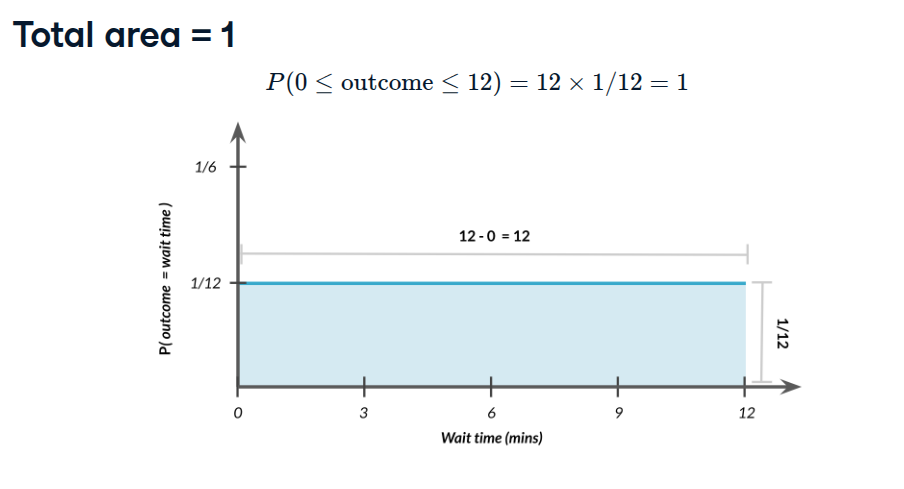

### **Calculation:**

- Probability of waiting between 0 and 12 minutes:
    - `(12 - 0) * (1/12) = 12 * (1/12) = 1` (**100%**)

---

## 7. Generating Random Numbers from a Uniform Distribution

You can generate random samples using `uniform.rvs()`.

### **Code Example:** Generate 10 Random Wait Times in [0, 5]

```python
from scipy.stats import uniform

random_waits = uniform.rvs(0, 5, size=10)
print(random_waits)
```

#### **Output:**  
(Example output — your numbers will differ due to randomness.)

```
[1.89740094 4.70673196 0.33224683 1.0137103  2.31641255 3.49969897
 0.29688598 0.92057234 4.71086658 1.56815855]
```

#### **Explanation (Line by Line):**

1. `from scipy.stats import uniform`
    - **As above.**
2. `random_waits = uniform.rvs(0, 5, size=10)`
    - **What:** Draws 10 random samples from a uniform distribution over [0, 5].
    - **Parameters:**
        - `0`: Lower bound.
        - `5`: Width (upper bound is 0 + 5 = 5).
        - `size=10`: Number of random values.
    - **Why:** To simulate random wait times or generate synthetic data.
    - **Result:** `random_waits` is an array of 10 numbers between 0 and 5.
3. `print(random_waits)`
    - **As above.**

**Significance:**  
Simulating data helps visualize and test statistical models.

---

## 8. Other Continuous Distributions

- Not all continuous distributions are uniform.
- **Other shapes:** Some values may be more probable than others (e.g., normal, exponential).
- **Key property:** The **total area under any continuous probability distribution is always 1** (represents certainty).

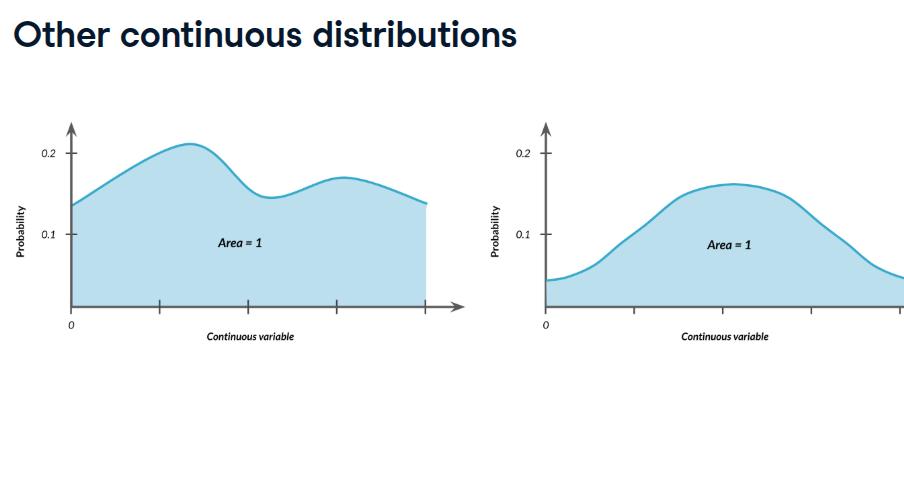


---

## 9 . Special Distributions:

- **Normal distribution:** Bell-shaped curve, common in nature (e.g., heights, test scores).
- **Exponential distribution:** Models waiting times for events that occur continuously and independently (e.g., radioactive decay, time between arrivals).

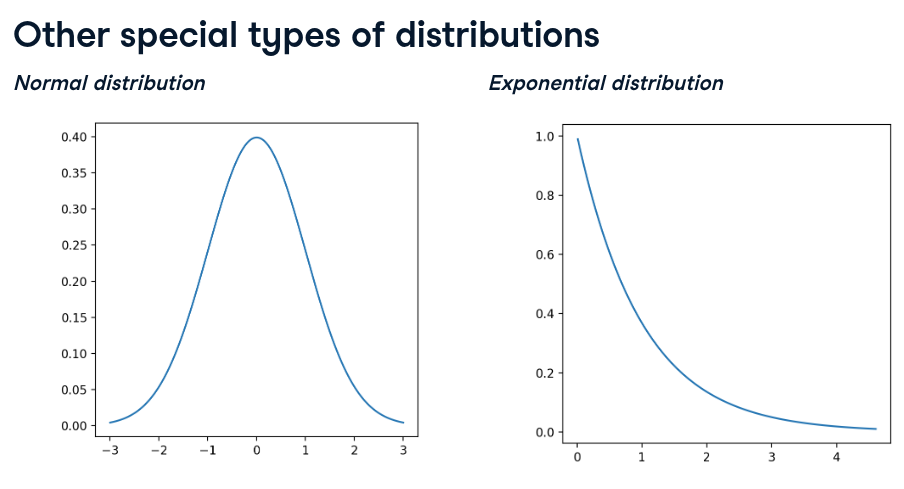

---


# Summary

- **Continuous uniform distribution** models equally likely outcomes over an interval.
- **Probability** is calculated as the **area under the curve** (rectangle for uniform).
- **Python tools**: Use `scipy.stats.uniform` for calculations and simulations.
- **Total area = 1**: Certainty that some value in the range will occur.
- **Other distributions** (normal, exponential) have different shapes but the same area rule.

---



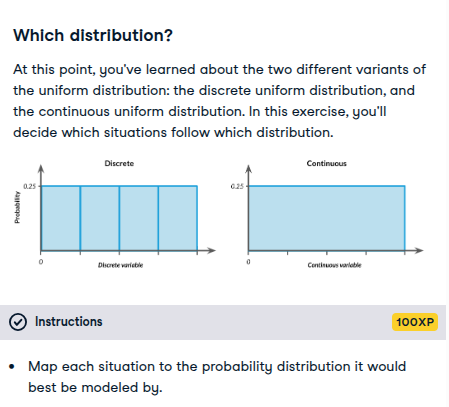

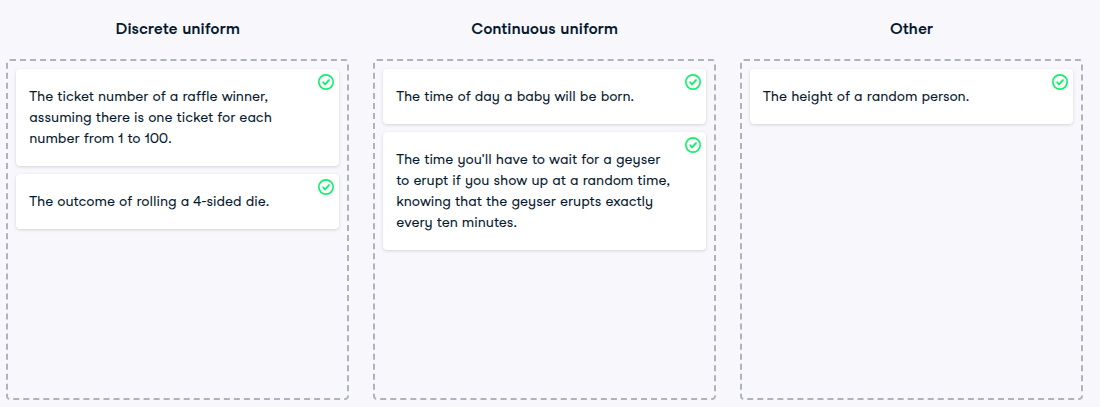

### Exercise
Data back-ups
The sales software used at your company is set to automatically back itself up, but no one knows exactly what time the back-ups happen. It is known, however, that back-ups happen exactly every 30 minutes. Amir comes back from sales meetings at random times to update the data on the client he just met with. He wants to know how long he'll have to wait for his newly-entered data to get backed up. Use your new knowledge of continuous uniform distributions to model this situation and answer Amir's questions.

Instructions 1/4
To model how long Amir will wait for a back-up using a continuous uniform distribution, save his lowest possible wait time as min_time and his longest possible wait time as max_time. Remember that back-ups happen every 30 minutes.

```python
# Min and max wait times for back-up that happens every 30 min
min_time = 0
max_time = 30
```

2. Import uniform from scipy.stats and calculate the probability that Amir has to wait less than 5 minutes, and store in a variable called prob_less_than_5.

```python
# Min and max wait times for back-up that happens every 30 min
min_time = 0
max_time = 30

# Import uniform from scipy.stats
from scipy.stats import uniform

# Calculate probability of waiting less than 5 mins
prob_less_than_5 = uniform.cdf(5, 0, 30)
print(prob_less_than_5)


<script.py> output:
    0.16666666666666666
    
```
3. Calculate the probability that Amir has to wait more than 5 minutes, and store in a variable called prob_greater_than_5.

```python
# Min and max wait times for back-up that happens every 30 min
min_time = 0
max_time = 30

# Import uniform from scipy.stats
from scipy.stats import uniform

# Calculate probability of waiting more than 5 mins
prob_greater_than_5 = 1 - uniform.cdf(5, 0, 30)
print(prob_greater_than_5)

<script.py> output:
    0.8333333333333334
```

4. Calculate the probability that Amir has to wait between 10 and 20 minutes, and store in a variable called prob_between_10_and_20.

```python
# Min and max wait times for back-up that happens every 30 min
min_time = 0
max_time = 30

# Import uniform from scipy.stats
from scipy.stats import uniform

# Calculate probability of waiting 10-20 mins
prob_between_10_and_20 =  uniform.cdf(20, 0, 30) - uniform.cdf(10, 0, 30)
print(prob_between_10_and_20)


<script.py> output:
    0.3333333333333333

```


### Exercise
Simulating wait times
To give Amir a better idea of how long he'll have to wait, you'll simulate Amir waiting 1000 times and create a histogram to show him what he should expect. Recall from the last exercise that his minimum wait time is 0 minutes and his maximum wait time is 30 minutes.

As usual, pandas as pd, numpy as np, and matplotlib.pyplot as plt are loaded.

Instructions 1/4
Set the random seed to 334.

```python

# Set random seed to 334
np.random.seed(334)
```
Import uniform from scipy.stats.

```python
# Set random seed to 334
np.random.seed(334)

# Import uniform
from scipy.stats import uniform
```

Generate 1000 wait times from the continuous uniform distribution that models Amir's wait time. Save this as wait_times.

```python
# Set random seed to 334
np.random.seed(334)

# Import uniform
from scipy.stats import uniform

# Generate 1000 wait times between 0 and 30 mins
wait_times = uniform.rvs(0, 30, size=1000)

print(wait_times)

<script.py> output:
    [ 7.144097    0.97455866  3.72802787  5.11644319  8.70602482 24.69140099
     23.98012075  3.19592668 25.1985306  17.89048629 24.68695356 18.27160808
     22.85829011  0.12929581 15.67789664  2.3262095  15.79151771 21.90473557
     18.25817257 15.78657023  ...... till 1 thousand
```

Create a histogram of the simulated wait times and show the plot.

```python
# Set random seed to 334
np.random.seed(334)

# Import uniform
from scipy.stats import uniform

# Generate 1000 wait times between 0 and 30 mins
wait_times = uniform.rvs(0, 30, size=1000)

# Create a histogram of simulated times and show plot
plt.hist(wait_times)
plt.show()

```

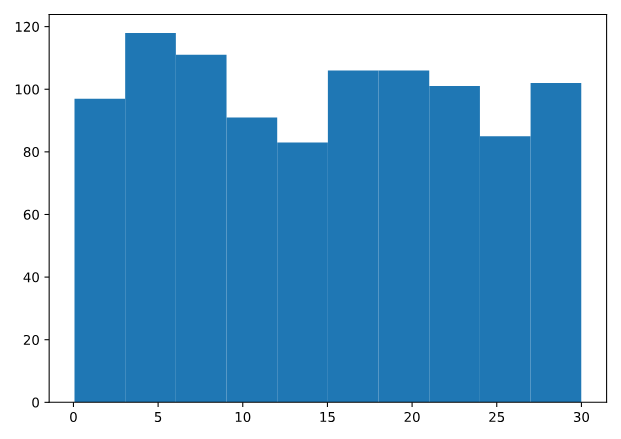

# Introduction to Statistics in Python: The Binomial Distribution

---

## 1. The Binomial Distribution

- **The binomial distribution** is a probability distribution that models the number of successes in a sequence of independent trials.
- **Example:** Flipping a coin (heads/tails) several times.

---

## 2. Coin Flipping: A Classic Binary Outcome

- **Binary outcomes:** Only two possible values per trial (e.g., heads/tails, 1/0, success/failure, win/loss).
- **Coin flip:** Each flip has a 50% chance (probability = 0.5) for heads or tails.

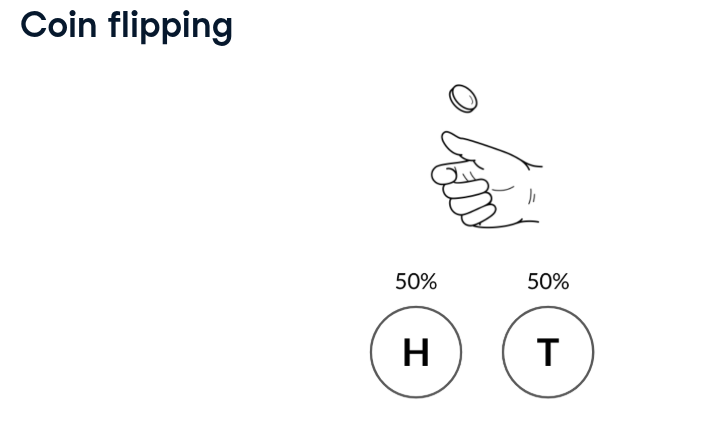

---

## 3. Simulating a Single Coin Flip in Python

We can simulate coin flips using the `binom.rvs` function from `scipy.stats`.

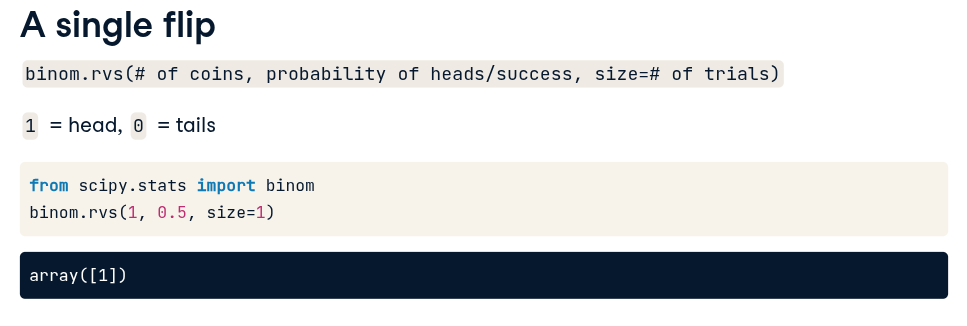

```python
from scipy.stats import binom

# Flip 1 coin, 1 time, 50% chance for heads
result = binom.rvs(1, 0.5, size=1)
print(result)
```

**Possible Output:**
```
[1]
```
or
```
[0]
```

### Line-by-line Explanation

- `from scipy.stats import binom`  
  *Imports the binomial distribution class from scipy.stats.*
- `binom.rvs(1, 0.5, size=1)`  
  *Simulates 1 trial (1 coin flip), with a probability of success (heads) of 0.5, and performs this simulation 1 time. Returns an array with the result (0 for tails, 1 for heads).*
- `print(result)`  
  *Displays the outcome.*

**Significance:**  
This simulates a single coin flip. The output `[1]` means "heads"; `[0]` means "tails".

---

## 4. Flipping One Coin Many Times

```python
result = binom.rvs(1, 0.5, size=8)
print(result)
```

**Possible Output:**
```
[1 1 0 1 0 0 1 0]
```

### Line-by-line Explanation

- `binom.rvs(1, 0.5, size=8)`  
  *Simulates 1 coin flip, 8 times, each with a 50% chance of heads. Returns an array of 8 results (0 or 1).*

**Significance:**  
Each entry is the result of a separate coin flip. The sequence shows heads/tails for each of 8 flips.

---

## 5. Flipping Many Coins One Time

```python
result = binom.rvs(8, 0.5, size=1)
print(result)
```

**Possible Output:**
```
[4]
```

### Explanation

- `binom.rvs(8, 0.5, size=1)`  
  *Simulates flipping 8 coins in a single trial, with a 50% chance of heads for each. Returns the total number of heads in that one trial.*

**Significance:**  
The output `[4]` means that out of 8 coins flipped at once, 4 came up heads.

---

## 6. Flipping Many Coins Many Times

```python
result = binom.rvs(3, 0.5, size=10)
print(result)
```

**Sample Output:**
```
[0 3 2 1 3 0 2 2 0 0]
```

### Explanation

- `binom.rvs(3, 0.5, size=10)`  
  *Performs 10 trials. In each trial, flips 3 coins (each with a 0.5 chance of heads), and counts the number of heads. Returns an array of 10 results, each between 0 and 3.*

**Significance:**  
Each number shows the count of heads in 3 coin flips, repeated 10 times.

---

## 7. Using Different Probabilities

You can change the probability for a biased coin.

```python
result = binom.rvs(3, 0.25, size=10)
print(result)
```

**Sample Output:**
```
[1 1 1 1 0 0 2 0 1 0]
```

### Explanation

- `binom.rvs(3, 0.25, size=10)`  
  *Performs 10 trials; in each trial, flips 3 coins, each with a 25% chance of heads.*

**Significance:**  
With a lower probability (0.25), it's less likely to get multiple heads, so more 0s and 1s appear in the output.

---

## 8. The Binomial Distribution: Theory

- **What does it model?**  
  The probability of getting a certain number of “successes” (e.g., heads) in a fixed number of independent trials.
- **Discrete distribution:**  
  The outcomes are countable (0, 1, 2, ..., n).
- **Parameters:**  
  - `n`: Number of trials.
  - `p`: Probability of success for each trial.

**Example:**

```python
result = binom.rvs(n=10, p=0.5, size=20)
print(result)
```

**Sample Output:**
```
[5 7 6 4 7 3 5 5 4 4 6 6 3 4 7 8 5 6 6 3]
```

### Explanation

- `n=10`: 10 coin flips per trial.
- `p=0.5`: Fair coin.
- `size=20`: 20 separate trials.

**Significance:**  
Shows how many heads appear in each set of 10 coin flips. Most results are around 5, reflecting the distribution's center.

---

## 9. Probability of Exactly 7 Heads (PMF)

To calculate the probability of getting exactly 7 heads out of 10 coin flips:

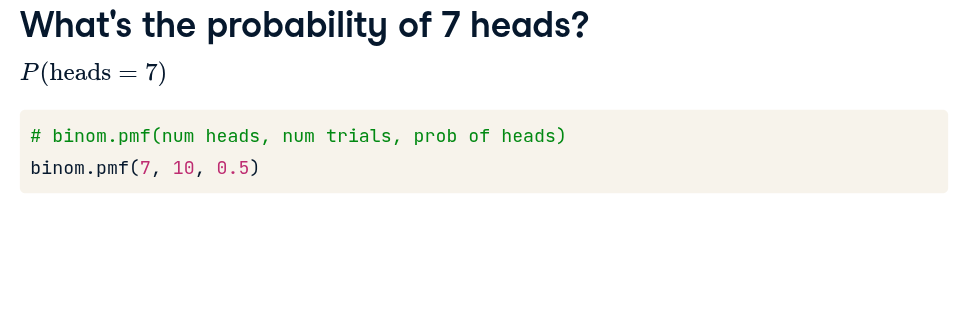

```python
prob = binom.pmf(7, 10, 0.5)
print(prob)
```

**Output:**
```
0.1171875
```

### Explanation

- `binom.pmf(k, n, p)`:  
  *Probability Mass Function. Computes the probability of getting exactly `k` successes in `n` trials, each with probability `p`.*
- `binom.pmf(7, 10, 0.5)`:  
  *Probability of exactly 7 heads in 10 fair coin flips.*

**Significance:**  
About 11.7% chance to get exactly 7 heads in 10 flips.

---

## 10. Probability of 7 or Fewer Heads (CDF)

To get the probability of getting **at most 7 heads**:

```python
prob = binom.cdf(7, 10, 0.5)
print(prob)
```

**Output:**
```
0.9453125
```

### Explanation

- `binom.cdf(k, n, p)`:  
  *Cumulative Distribution Function. Probability of getting `k` or fewer successes.*
- `binom.cdf(7, 10, 0.5)`:  
  *Probability of getting 0 through 7 heads in 10 flips.*

**Significance:**  
There is a 94.5% chance to get 7 or fewer heads in 10 coin flips.

---

## 11. Probability of More Than 7 Heads

To find the probability of getting **more than 7 heads**:

```python
prob = 1 - binom.cdf(7, 10, 0.5)
print(prob)
```

**Output:**
```
0.0546875
```

### Explanation

- `1 - binom.cdf(7, 10, 0.5)`:  
  *Probability of more than 7 heads (i.e., 8, 9, or 10).*

**Significance:**  
Only about 5.5% chance to get more than 7 heads.

---


## 12. Expected Value of the Binomial Distribution



The **expected value** (mean) for a binomial distribution is:

\\[
E[X] = n \times p
\\]

**For 10 flips with probability 0.5:**

\\[
E[X] = 10 \times 0.5 = 5
\\]

**Explanation:**

- **n:** Number of trials (e.g., number of coin flips)
- **p:** Probability of success on each trial (e.g., probability of heads)
- **Significance:**  
  On average, we expect **5 heads** in 10 flips of a fair coin.

---


## 13. Independence: When Binomial Distribution Applies

- **Requirement:**  
  Each trial must be independent; the outcome of one does not affect the next.
- **Example:**  
  Flipping a coin repeatedly, picking cards *with replacement*.


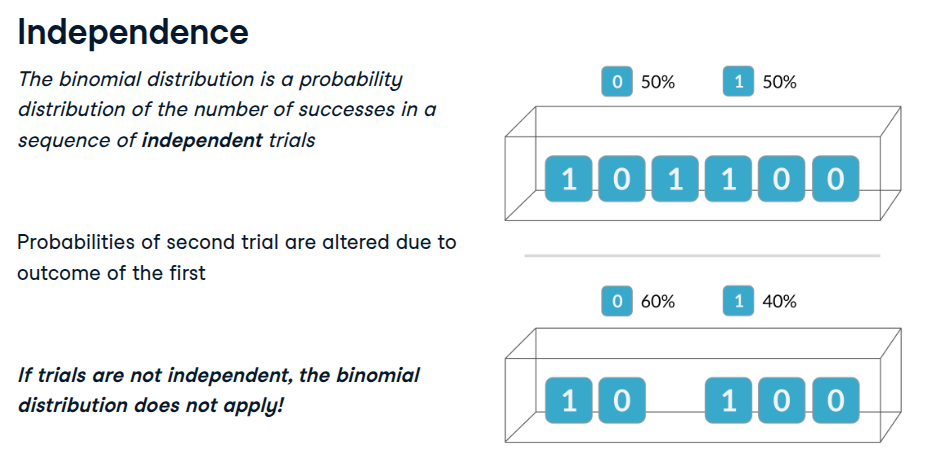

---

## 14. What If Trials Aren't Independent?

- **If not independent:**  
  The binomial distribution **does not apply**.
- **Example:**  
  Drawing cards *without replacement* changes the probability for each subsequent trial.
- **Consequence:**  
  Cannot use binomial formulas if the trials affect each other's probabilities.

---


## Summary Table: Key Binomial Distribution Methods

| Function                | Purpose                                               | Example                        | Output/Meaning             |
|-------------------------|-------------------------------------------------------|--------------------------------|----------------------------|
| `binom.rvs(n, p, size)` | Simulate random binomial outcomes                     | `binom.rvs(3, 0.5, size=10)`   | Array of #successes        |
| `binom.pmf(k, n, p)`    | Probability of exactly `k` successes                  | `binom.pmf(7, 10, 0.5)`        | Probability value          |
| `binom.cdf(k, n, p)`    | Probability of `k` or fewer successes                 | `binom.cdf(7, 10, 0.5)`        | Probability value          |

---

## Key Takeaways

- The **binomial distribution** is the foundation for analyzing binary/outcome experiments (like coin flips).
- Use it for **independent, identical trials** with two outcomes.
- Python's `scipy.stats.binom` provides tools to simulate and calculate probabilities and expected values for these scenarios.
- **Always check for independence** before applying the binomial model!

---



### Exercise
Simulating sales deals
Assume that Amir usually works on 3 deals per week, and overall, he wins 30% of deals he works on. Each deal has a binary outcome: it's either lost, or won, so you can model his sales deals with a binomial distribution. In this exercise, you'll help Amir simulate a year's worth of his deals so he can better understand his performance.

numpy is imported as np.

Instructions 1/4

Import binom from scipy.stats and set the random seed to 10.
```python
# Import binom from scipy.stats
from scipy.stats import binom

# Set random seed to 10
np.random.seed(10)
```

Simulate 1 deal worked on by Amir, who wins 30% of the deals he works on.

```python
# Import binom from scipy.stats
from scipy.stats import binom

# Set random seed to 10
np.random.seed(10)

# Simulate a single deal
print(binom.rvs(1, 0.3, size=1))

<script.py> output:
    [1]
```
Simulate a typical week of Amir's deals, or one week of 3 deals.


```python
# Import binom from scipy.stats
from scipy.stats import binom

# Set random seed to 10
np.random.seed(10)

# Simulate 1 week of 3 deals
print(binom.rvs( 3, 0.3, size = 1))

<script.py> output:
    [1]

```
Simulate a year's worth of Amir's deals, or 52 weeks of 3 deals each, and store in deals.
Print the mean number of deals he won per week.


```python
# Import binom from scipy.stats
from scipy.stats import binom

# Set random seed to 10
np.random.seed(10)

# Simulate 52 weeks of 3 deals
deals = binom.rvs( n=3, p=0.3, size= 52)

# Print mean deals won per week
print(np.mean(deals))


<script.py> output:
    0.8269230769230769
In [1]:


```

### Exercise
Calculating binomial probabilities
Just as in the last exercise, assume that Amir wins 30% of deals. He wants to get an idea of how likely he is to close a certain number of deals each week. In this exercise, you'll calculate what the chances are of him closing different numbers of deals using the binomial distribution.

binom is imported from scipy.stats.

Instructions 1/3

What's the probability that Amir closes all 3 deals in a week? Save this as prob_3.
```python
# Probability of closing 3 out of 3 deals
prob_3 = binom.pmf(3, 3, 0.3)

print(prob_3)

<script.py> output:
    0.026999999999999996
In [1]:

```
What's the probability that Amir closes 1 or fewer deals in a week? Save this as prob_less_than_or_equal_1.

```python
# Probability of closing <= 1 deal out of 3 deals
prob_less_than_or_equal_1 = binom.cdf(1, 3, 0.3)

print(prob_less_than_or_equal_1)

<script.py> output:
    0.784
In [1]:
```
What's the probability that Amir closes more than 1 deal? Save this as prob_greater_than_1.

```python
# Probability of closing > 1 deal out of 3 deals
prob_greater_than_1 = 1 - binom.cdf(1, 3, 0.3)

print(prob_greater_than_1)

<script.py> output:
    0.21599999999999997
In [1]:

```

### Exercise
How many sales will be won?
Now Amir wants to know how many deals he can expect to close each week if his win rate changes. Luckily, you can use your binomial distribution knowledge to help him calculate the expected value in different situations. Recall from the video that the expected value of a binomial distribution can be calculated by n x p 

Instructions

Calculate the expected number of sales out of the 3 he works on that Amir will win each week if he maintains his 30% win rate.
Calculate the expected number of sales out of the 3 he works on that he'll win if his win rate drops to 25%.
Calculate the expected number of sales out of the 3 he works on that he'll win if his win rate rises to 35%.

```python
# Expected number won with 30% win rate
won_30pct = 3 * 0.3
print(won_30pct)

# Expected number won with 25% win rate
won_25pct = 3 * 0.25
print(won_25pct)

# Expected number won with 35% win rate
won_35pct = 3 * 0.35
print(won_35pct)

<script.py> output:
    0.8999999999999999
    0.75
    1.0499999999999998


```